In [1]:
# latest update
# October 1st 2017
# Changes done by: Jimmy Vivas
# Added code description

# This code was developed by Jimmy Vivas

# The code will take all CSv files from a specific directory and process them at the same Time
# The program will need manual input to replace strings found for numeric data or null value
#   It will assign an integer value for each distinct string for each column (sensor)
# The code will generate as many csv files pero 1MM rows

# STEP 1 -. Update the path where the CSV file is located and hit SHIFT + ENTER


### Create two folders
#### Folder 1 = CSVPAath1 is where the CSV file to be processed is located
#### Folder 2 = FinalPath is where all the files processed will be created

In [2]:
# My Mac Path
CSVPath1 = '/Users/jvivas/Documents/Aspen/PTT/Sensor Data/C002B/to be processed'
FinalPath = '/Users/jvivas/Documents/Aspen/PTT/Sensor Data/C002B/processed'

# STEP 2-. Execute Next line Hitting Shift+ENTER

In [3]:
from utils import *

In [4]:
CSVFileList = GetCSVList(CSVPath1)

CSVFile = CSVFileList[0]
CSVFileWithPath = CSVPath1 + "/" + CSVFileList[0]

csvFileSizeGB = GetFileSize(CSVFileWithPath)

if csvFileSizeGB > 1:
    StringListForAllSensors = SplitCSVFile_GetStrings(CSVFileWithPath, CSVFile)
    print ('These are all the strings found in the file: ' + str(StringListForAllSensors))
else:
    
    df2 = LoadCSV(CSVFileWithPath, CSVFile)
    
    # Rename date and time column
    print ('Renaming date and time column')
    RenameColumn(df2)
    # Apply Date and time format to dataframe
    print ('Applying date and time format')
    ApplyDateFormat(df2)
    
    # Apply Index and create two dataframes
    df2_1, df2_2 = SetIndex(df2)
    
    print ('Extracting strings from csv file')
    StringListForAllSensors = ExtractStrings(df2_1, df2_2)
    
    print ('These are all the strings found in the csv file: ' + str(StringListForAllSensors))

# Convert all strings to a Dictionary
StringListDict = {}.fromkeys(StringListForAllSensors, 'null')

# print ("# Run following line to see the list of Strings")
## Copy the result and paste it in the following line of code")
StringListDict

Loading 200C2_Fixed_DateFormat_6Columns_Small.csv
Renaming date and time column
Applying date and time format
Extracting strings from csv file
Converting df to numeric
Total columns with text: Index(['A1-200TI727HA.PV', '100TI97.PV', '200PI53.PV', '200TI371.PV',
       '200TI348.PV', '200TI347.PV'],
      dtype='object')
Sensors with text in their Values: ['A1-200TI727HA.PV']
Processing Sensor: A1-200TI727HA.PV
These are all the strings found in Sensor A1-200TI727HA.PV: ['No Data']
These are all the strings found in the csv file: ['No Data']


{'No Data': 'null'}

# STEP 3 -. Copy the StringListDict and replace the null with the desired numeric data

In [5]:
# Replacing known test to null
df2_2 = ReplaceStrings(df2_2, StringListDict)

# Create dataframe to export individual tags
df_final = pd.concat([df2_1, df2_2])

# Export Individual Tags to CSV
print("Creating CSV per TagName")
ExportTagNamesToCSV(df_final,FinalPath)

# Merge dataframes to export to CSV
mdf = FormatToPrevise(df2_1,df2_2)

# Check format data to be exportedaa
mdf.head(25)

# Export to CSV
print ('Creating CSVs to be imported into Aspen Mtell')
SplitPreviseFormatCSVFile(mdf,CSVFileList,FinalPath)

Creating CSV per TagName
Creating CSVs to be imported into Aspen Mtell


# Analytics

In [13]:
df_final_nan = df2_2.apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [14]:
df_final_nan.head()

,A1-200TI727HA.PV,100TI97.PV,200PI53.PV,200TI371.PV,200TI348.PV,200TI347.PV
DATETIME,,,,,,
1/1/2014 0:00,NaN,23.728256,2.518174,69.249283,60.885456,56.545738
1/1/2014 0:05,NaN,23.606651,2.508537,69.088890,60.658840,56.511757
1/1/2014 0:10,NaN,23.528124,2.502900,69.039642,60.466503,56.509052
1/1/2014 0:15,NaN,23.647432,2.497166,69.006332,60.593910,56.434353
1/1/2014 0:20,NaN,23.664402,2.491784,68.754303,60.740746,56.482708


In [15]:
df_final_nan = df_final_nan.reset_index()

In [16]:
df_final_nan.head()

,DATETIME,A1-200TI727HA.PV,100TI97.PV,200PI53.PV,200TI371.PV,200TI348.PV,200TI347.PV
0,1/1/2014 0:00,NaN,23.728256,2.518174,69.249283,60.885456,56.545738
1,1/1/2014 0:05,NaN,23.606651,2.508537,69.088890,60.658840,56.511757
2,1/1/2014 0:10,NaN,23.528124,2.502900,69.039642,60.466503,56.509052
3,1/1/2014 0:15,NaN,23.647432,2.497166,69.006332,60.593910,56.434353
4,1/1/2014 0:20,NaN,23.664402,2.491784,68.754303,60.740746,56.482708


In [27]:
df_final_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 7 columns):
DATETIME            3974 non-null datetime64[ns]
A1-200TI727HA.PV    0 non-null float64
100TI97.PV          3974 non-null float64
200PI53.PV          3974 non-null float64
200TI371.PV         3974 non-null float64
200TI348.PV         3974 non-null float64
200TI347.PV         3974 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 217.4 KB


In [19]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [26]:
df_final_nan['DATETIME'] = pd.to_datetime(df_final_nan['DATETIME'])

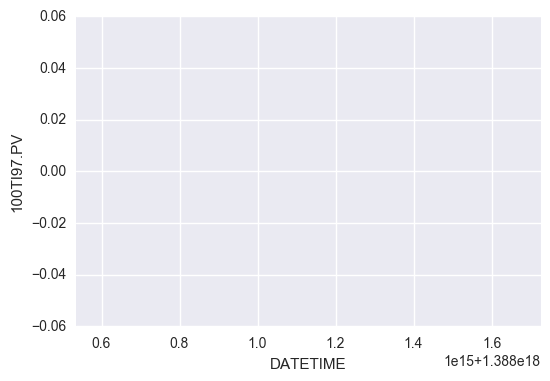

In [28]:
sns.tsplot(time='DATETIME', value='100TI97.PV', data=df_final_nan)

In [ ]:
print ("a")